# SALES DATA ANALYSIS - E-COMMERCE



### Ujian Modul 2 - EDA




## Problem:

    - Kita ingin mengadakan diskon tahunan berdasarkan data yang ada. Beberapa product akan kita kaji untuk diberikan 
      discount berdasarkan gender untuk menggenjot penjualan
    - Kita akan mengaji barang yang sangat laku di E-Commerce based on category



## Goal:

    - Menentukan setiap product (m/f) dari kategori apa yang paling laku
    - Menentukan apakah rating mempengaruhi penjualan product


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('ecommerce.csv',index_col=0)
df

,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...
175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


### DESCRIBING DATA (Mencari column, jumlah missing value, jumlah unique data)

In [127]:
print('Columns: ',df.columns)

dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

Columns:  Index(['category', 'product', 'Original_price', 'price', 'perc_of_unit_sold',
       'rating', 'shpping_rate', 'gender'],
      dtype='object')


In [130]:
pd.DataFrame(dataDesc, columns=[
    'Data Features',
    'Data Types',
    'Null',
    'Null Percentage',
    'Unique',
    'Unique Sample'
] )

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,category,object,0,0.00,7,"[Perfumes & Fragrances, Wallets]"
1,product,object,0,0.00,602,[Invicta Pro Diver Men's Black Dial Stainless ...
2,Original_price,float64,26,4.27,322,"[4031.0, 319.0]"
3,price,float64,0,0.00,457,"[448.99, 653.49]"
4,perc_of_unit_sold,float64,87,14.29,92,"[68.0, 60.0]"
5,rating,float64,182,29.89,24,"[56.0, 92.0]"
6,shpping_rate,object,42,6.90,2,"[FREE Shipping, Eligible for FREE Shipping]"
7,gender,object,28,4.60,3,"[Unisex, women]"


## Mengubah nama Column 

In [131]:
df.rename(columns={"shpping_rate": "shipping_rate"}, inplace=True)
df

,category,product,Original_price,price,perc_of_unit_sold,rating,shipping_rate,gender
0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...
175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


## Mengecek Missing Value

In [132]:
#Mengecek jumlah missing value di kolom-kolom

df1=df #Membuat variable baru untuk dipakai sementara

df1.isnull().sum() 

category               0
product                0
Original_price        26
price                  0
perc_of_unit_sold     87
rating               182
shipping_rate         42
gender                28
dtype: int64

In [133]:
#Pertama kita isi missing value pada kolom yang ada missing value nya

df1 = df1.dropna()

'''Didrop karena missing value yang terdapaat pada kolom original price, perc_of_unit_sold,rating, shipping_rate, dan gender tidak bisa diwakili oleh apapun, karena value nya haruslah unik'''

'Didrop karena missing value yang terdapaat pada kolom original price, perc_of_unit_sold,rating, shipping_rate, dan gender tidak bisa diwakili oleh apapun, karena value nya haruslah unik'

In [135]:
#Mengecek ulang apakah missing value sudah di handling atau belum

df1.isnull().sum() 

category             0
product              0
Original_price       0
price                0
perc_of_unit_sold    0
rating               0
shipping_rate        0
gender               0
dtype: int64

### Pengecekan data outliers terhadap harga penjualan

In [136]:
Q1 = df1.describe()['price']['25%']
Q3 = df1.describe()['price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR) #WHISKER
Lower_Fence = Q1 - (1.5 * IQR) #WHISKER

print('Quartil 1: ', Q1)
print('Quartil 3: ', Q3)
print('Interquartil Range: ', IQR)
print('Upper Fence: ', Upper_Fence)
print('Lower Fence: ', Lower_Fence)

Quartil 1:  125.99
Quartil 3:  470.485
Interquartil Range:  344.495
Upper Fence:  987.2275000000001
Lower Fence:  -390.75250000000005


## Data Analysis - Visualization

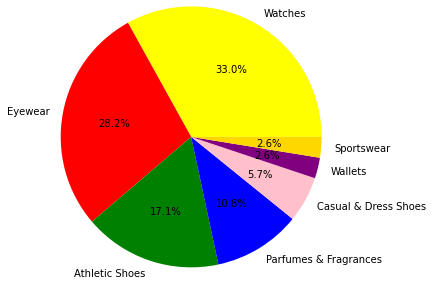

In [137]:
#Mencari komposisi perbandingan penjualan tiap kategori dengan menggunakan pie chart

df1['category'].value_counts()

persentase = df1.category.value_counts().values
nama = ['Watches','Eyewear','Athletic Shoes','Parfumes & Fragrances','Casual & Dress Shoes', 'Wallets','Sportswear']
plt.pie(persentase, labels=nama,
        colors= ['yellow','red','green','blue','pink','purple','gold'],
        startangle=0,
        textprops = {
            'size' : 10,
            'color' : 'black'
        },
        autopct = '%1.1f%%',
       radius = 1.5)
plt.show()

In [213]:
#Menggunakan barplot untuk mengetahui jumlah penjualan barang based on gender

Productlaku = (pd.crosstab(index=df1['gender'], columns=df1['category'], margins=True))

Productlaku

category,Athletic Shoes,Casual & Dress Shoes,Eyewear,Perfumes & Fragrances,Sportswear,Wallets,Watches,All
gender,,,,,,,,
Unisex,0,0,52,5,0,1,5,63
men,31,9,38,23,5,17,76,199
women,7,0,9,32,4,2,35,89
All,38,9,99,60,9,20,116,351


Text(0, 0.5, 'Gender')

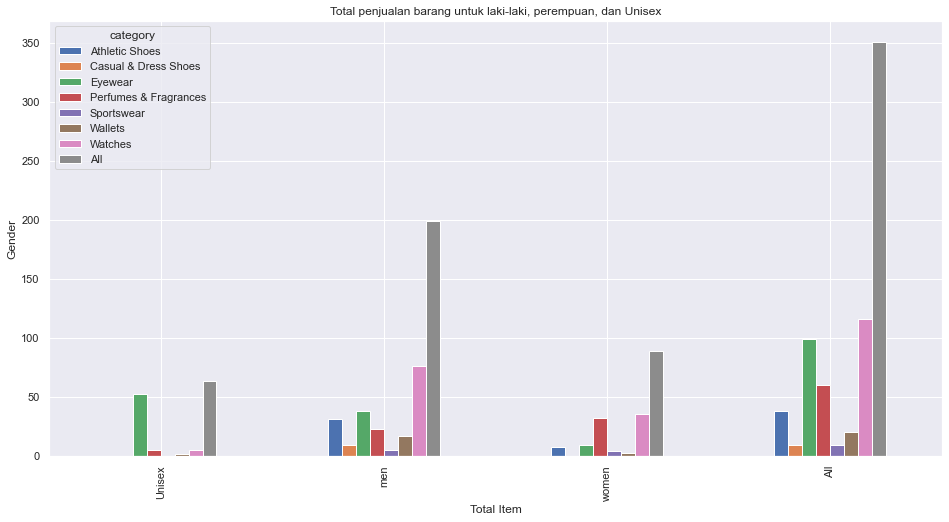

In [214]:
sns.set(rc={'figure.figsize':(16,8)})
Productlaku_bar = Productlaku.plot(kind='bar')
Productlaku_bar.set_title('Total penjualan barang untuk laki-laki, perempuan, dan Unisex')
Productlaku_bar.set_xlabel('Total Item')
Productlaku_bar.set_ylabel('Gender')

## Mengetahui persentase barang unisex, men, dan women

In [197]:
df1_unisex=df1.loc[(df1['gender'] == 'Unisex')]
df1_unisex=df1_unisex.sort_values('perc_of_unit_sold',ascending=False)
df1_unisex

,category,product,Original_price,price,perc_of_unit_sold,rating,shipping_rate,gender
25,Perfumes & Fragrances,Mancera Roses Vanille for Unisex - Eau de Parf...,415.0,197.98,99.0,92.0,Eligible for FREE Shipping,Unisex
89,Eyewear,"Polaroid Sunglasses For Unisex, Black- Pld 205...",250.0,168.99,96.0,78.0,Eligible for FREE Shipping,Unisex
14,Perfumes & Fragrances,"Oud Sharqia for Unisex - Eau de Parfum, 80ml",157.0,22.00,96.0,78.0,Eligible for FREE Shipping,Unisex
81,Eyewear,Ray-Ban Aviator Unisex Sunglasses - Rb3025-W08...,945.0,302.98,96.0,80.0,FREE Shipping,Unisex
49,Watches,Casio Unisex Illuminated Digital Dial Gold Ton...,168.0,111.79,96.0,88.0,Eligible for FREE Shipping,Unisex
...,...,...,...,...,...,...,...,...
112,Eyewear,Ray-Ban Round Unisex Sunglasses - 4257 6092/55...,890.0,385.49,12.0,80.0,FREE Shipping,Unisex
109,Eyewear,Ray-Ban Erika Unisex Sunglasses - 4243 6225/19...,720.0,312.98,12.0,80.0,FREE Shipping,Unisex
128,Eyewear,"Ray-Ban Unisex's Rb4075 Sunglasses, Tortoise, 61",1169.0,457.99,10.0,100.0,FREE Shipping,Unisex
105,Eyewear,Ray-Ban Aviator Unisex Sunglasses - Rb3025-019...,855.0,473.98,3.0,90.0,FREE Shipping,Unisex


Text(0, 0.5, 'Percentage %')

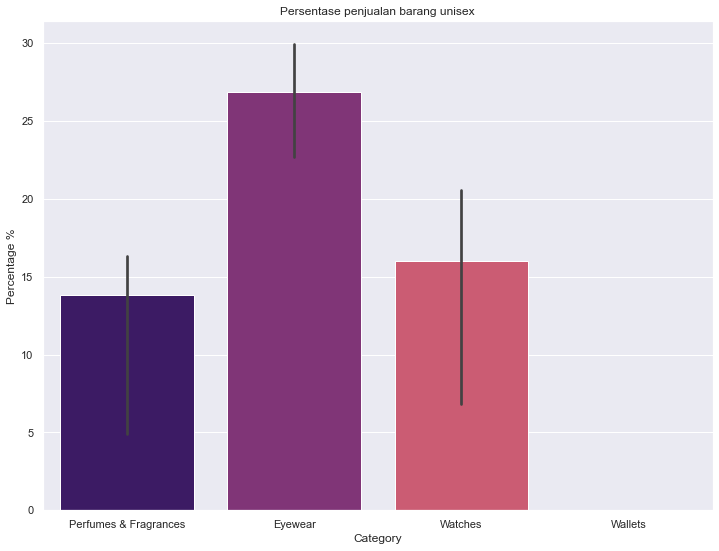

In [200]:
plt.figure(figsize=(12,9))
unisex_bar=sns.barplot(x = df1_unisex['category'], y = df1_unisex['perc_of_unit_sold'], estimator=np.std,palette='magma')
unisex_bar.set_title('Persentase penjualan barang unisex')
unisex_bar.set_xlabel('Category')
unisex_bar.set_ylabel('Percentage %')

In [191]:
#Barplot digunakan untuk membandingkan bi-/multivariate, dalam kasus ini kita mau membandingkan category dengan presentase penjualan

df1_men=df1.loc[(df1['gender'] == 'men')]
df1_men=df1_men.sort_values('perc_of_unit_sold',ascending=False)
df1_men


,category,product,Original_price,price,perc_of_unit_sold,rating,shipping_rate,gender
23,Eyewear,Ray-Ban Aviator Sunglasses For Men - Rb3449-00...,770.0,464.49,99.0,86.0,FREE Shipping,men
169,Watches,Hugo Boss Men's Black Dial Silicone Band Watch...,685.0,435.98,98.0,96.0,FREE Shipping,men
66,Watches,JBW Jet Setter Men's 234 Diamonds Gold Dial Go...,29970.0,2115.49,98.0,72.0,FREE Shipping,men
48,Eyewear,"Ray-Ban Sunglasses For Men - Grey, 3553I, 59, ...",525.0,282.99,98.0,86.0,FREE Shipping,men
40,Perfumes & Fragrances,Calvin Klein Euphoria Intense for Men - Eau de...,282.0,84.09,98.0,84.0,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...
4,Wallets,guess Men's Wallet 31GUE13142-Black,195.0,84.00,15.0,96.0,Eligible for FREE Shipping,men
125,Eyewear,"Ray-Ban Sunglasses For Men, Size 51 mm, 4246, ...",790.0,443.49,14.0,84.0,FREE Shipping,men
5,Wallets,guess Men's Wallet 31GUE13150-Black,160.0,78.49,14.0,100.0,Eligible for FREE Shipping,men
53,Watches,"Burberry BU9006 For Men Analog, Casual Watch",2034.0,944.98,13.0,60.0,FREE Shipping,men


Text(0, 0.5, 'Percentage %')

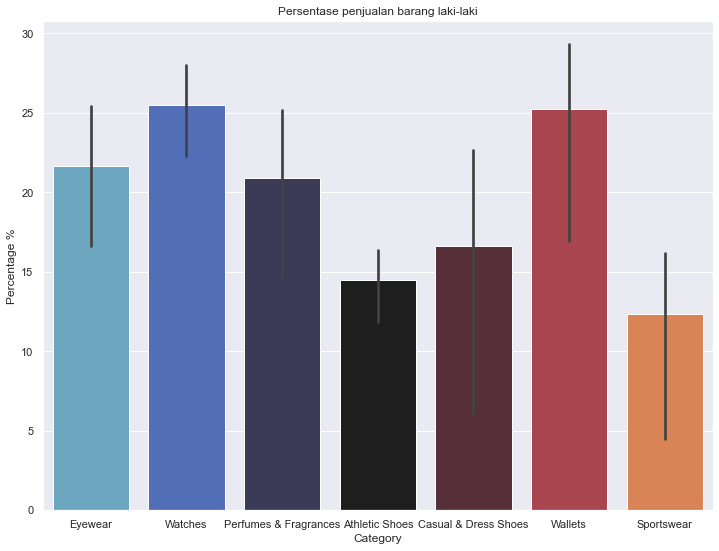

In [207]:
plt.figure(figsize=(12,9))
df1_men_bar=sns.barplot(x = df1_men['category'], y = df1_men['perc_of_unit_sold'], estimator=np.std,palette='icefire')

df1_men_bar.set_title('Persentase penjualan barang laki-laki')
df1_men_bar.set_xlabel('Category')
df1_men_bar.set_ylabel('Percentage %')

In [193]:
#Barplot digunakan untuk membandingkan bi-/multivariate, dalam kasus ini kita mau membandingkan category dengan presentase penjualan

df1_women=df1.loc[(df1['gender'] == 'women')]
df1_women=df1_women.sort_values('perc_of_unit_sold',ascending=False)
df1_women



,category,product,Original_price,price,perc_of_unit_sold,rating,shipping_rate,gender
38,Perfumes & Fragrances,"Burberry London for Women - Eau de Parfum, 100ml",252.0,127.97,98.0,90.0,Eligible for FREE Shipping,women
9,Perfumes & Fragrances,"Calvin Klein Beauty for Women - Eau de Parfum,...",357.0,84.98,97.0,86.0,Eligible for FREE Shipping,women
91,Watches,Fossil Jacqueline Women'S Rose Gold Dial Stain...,1452.0,384.00,96.0,84.0,FREE Shipping,women
172,Watches,JBW Victory Women's 16 Diamonds Mother of Pear...,5587.0,774.48,95.0,88.0,FREE Shipping,women
2,Watches,JBW Mondrian Women's 16 Diamonds Rose Gold Dia...,2990.0,564.98,94.0,88.0,FREE Shipping,women
...,...,...,...,...,...,...,...,...
90,Eyewear,Polaroid PLD 4062/S/X BLACK/GREY women Sunglasses,250.0,159.48,18.0,90.0,Eligible for FREE Shipping,women
109,Watches,Akribos XXIV Women's Cream Dial Mixed Material...,909.0,282.99,18.0,94.0,FREE Shipping,women
32,Watches,Tissot Casual Watch For Women Analog Stainless...,1580.0,855.49,17.0,90.0,FREE Shipping,women
34,Watches,Tissot Womens Round Black Dial Silicone Bracel...,2370.0,1307.99,14.0,80.0,FREE Shipping,women


Text(0, 0.5, 'Percentage %')

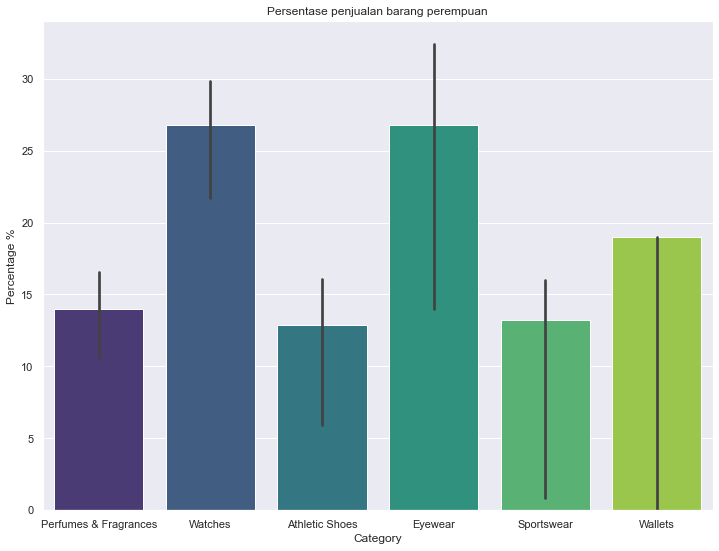

In [206]:
plt.figure(figsize=(12,9))
df1_women_bar=sns.barplot(x = df1_women['category'], y = df1_women['perc_of_unit_sold'], estimator=np.std,palette='viridis')

df1_women_bar.set_title('Persentase penjualan barang perempuan')
df1_women_bar.set_xlabel('Category')
df1_women_bar.set_ylabel('Percentage %')

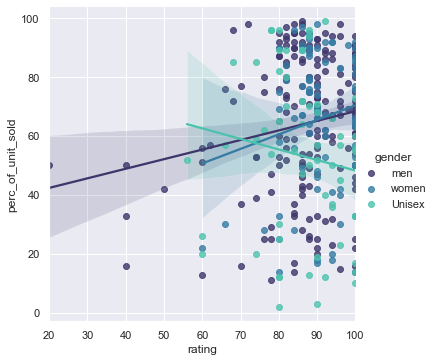

In [205]:
# Residplot berfungsi untuk mengecek apakah simple regression dalam sebuah dataset

sns.lmplot(x = 'rating', y = 'perc_of_unit_sold', data=df1, hue='gender', palette='mako')

In [182]:
#sns.relplot(y='perc_of_unit_sold',x='rating',data=df1,hue='gender',palette='Set1')

# Kesimpulan

    Kesimpulan 1:
    
       Dari barplot di data analysis di atas ditunjukkan bahwa, secara mengejutkan barang untuk kaum adam mendominasi penjualan
        di angka 199, sedangkan barang untuk kaum hawa hanya 89. Untuk kedua gender ditunjukkan jelas, baik Jam, eyewear dan 
        dompet sangatlah laku di pasaran, baik untuk kaum adam maupun kaum hawa. Sedangkan untuk barang yang bisa ditujukkan
        kedua gender tersebut (unisex) menunjukkan bahwa eyewear, parfum/wewangian, dan jam tangan mendominasi etalase 
        penjualan.
    
       Eyewear dan jam tangan sangatlah mendominasi penjualan.

    Kesimpulan 2:
    
        Residplot menunjukkan bahwa ada korelasi positif antara gender,rating, dan Persentase penjualan.
        Barang untuk Laki-laki dan perempuan cenderung tidak dibeli, jika barang tersebut mempunyai rating yang rendah.
        Untuk barang unisex, terdapat pengecualian yang ditunjukan dengan penggambaran trendline negatif.
    
        Rating sangatlah mempengaruhi presentase penjualan.
    
    
    
    
## Saran

    Untuk menjual barang di akhir tahun diperlukan strategi yang baik. Semua insight dari pengolahan data sangatlah membantu
    untuk mengambil keputusan jenis barang yang bisa dijual dengan harga khusus.
    Dari kesimpulan-kesimpulan di atas, saran yang bisa kita berikan adalah:
        
    1. Barang tersebut haruslah mempunyai rating yang baik
    2. Kaum adam dan kaum hawa sangatlah menggemari Jam tangan,kacamata dan dompet, dari ketiga item dengan rating
       yang baik ini bisa kita coba untuk memberikan harga diskon di akhir tahun untuk meningkatkan penjualan dengan
       cepat dan signifikan.
    3. Category sportwear, sepatu olahraga cukup memiliki peran yang baik walaupun penjualannya tidak sebaik ketiga kategori          terfavorit.Disamping angka persentase penjualan yang cukup baik, lifestyle, dan animo masyarakat masa kini yang                mengedepankan olahraga dan hidup sehat bisa memberikan dampak yang cukup signifikan dalam menggenjot angka
       penjualan dari 2 kategori ini.
      
     Dengan mempertimbangkan saran kedua, yang mana memang sudah baik penjualan dari ketiga kategori terfavorit, maka
     saya sebagai data scientist cukup kuat untuk menyarankan pilihan ketiga, dimana kategori sportwear dan athletic shoes
     a.k.a sepatu olahraga diberikan highlight dengan memberikan potongan harga di akhir tahun, terlebih di tahun yang baru
     sangatlah banyak masyarakat yang mempunyai resolusi "rajin berolahraga agar sehat jasmani dan rohani".
            
            


            
            
            
# TERIMA KASIH